In [2]:
import os, importlib, sys, time

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import scipy.linalg as la
import scipy.stats as stats

In [5]:
import freqepid

In [6]:
# %load_ext jupyternotify

# 1. parameters

In [7]:
T = 120
T0 = 40

In [8]:
GPi = np.load('data/GPi.npz')

## observation parameters

In [9]:
alpha = 0.01
r_Y = 10

$$Y_t = NegBinom( \frac{EY_t}{r_Y + EY_t}, r_Y )$$

$$ EY_t = \alpha\sum_{s=1}^{t-1} I_s \pi_{t-s} $$

## latent parameters

In [10]:
d = 2
beta = np.array([0, -2.2])

In [11]:
r_I = 10
K = 6.5

$$I_t = NegBinom( \frac{EI_t}{r_I + EI_t}, r_I )$$

$$ EI_t = R(\bar{A}_t, \beta) \sum_{s=1}^{t-1} I_s g_{t-s} $$

$$R(\bar{A}_t, \beta) = \frac{K}{1+\exp(- \beta^\top A_t)}$$

## seed values

In [12]:
mu = np.log(100)

$$I_{[-T_0,0)} = \exp(\mu_0)$$

# 2. simulation

## load simulation

In [13]:
data = pd.read_feather('data/simulation_randinf.feather')

In [14]:
data_i = data[data['sim']==0]
A = np.stack([np.full(T, 1), data_i["intervention"].to_numpy()], -1)
R = data_i["R"].to_numpy()
EI = data_i["EI"].to_numpy()
I = data_i["infection"].to_numpy()
EY = data_i["EY"].to_numpy()
Y = data_i["death"].to_numpy()

In [15]:
data_i

,sim,date,R,EI,infection,EY,death,intervention
0,0,0,3.250000,324.997762,356.0,0.956069,0,0
1,0,1,3.250000,340.245831,298.0,0.962543,2,0
2,0,2,3.250000,392.196621,409.0,0.968283,0,0
3,0,3,3.250000,471.047829,545.0,0.973654,1,0
4,0,4,3.250000,581.900998,584.0,0.979752,1,0
...,...,...,...,...,...,...,...,...
115,0,115,0.648378,371.111321,316.0,15.952502,18,1
116,0,116,0.648378,353.729962,301.0,15.065929,6,1
117,0,117,0.648378,334.027910,314.0,14.232065,22,1
118,0,118,0.648378,313.305734,285.0,13.440178,20,1


# 3. fit by coordinate descent method

In [16]:
model = freqepid.Model(GPi['g'], GPi['pi'], alpha, K, T0, 'normal')

In [17]:
nhs, mhs, bhs, lls = \
model.fit(A, Y, n_iter=500, history=True, verbose=True)

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:141: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]
/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:146: RuntimeWarning: divide by zero encountered in log
  log_err_ratio = np.log(Y / self.predict_EY(A, 0, binit))


Before EM, ll: -669.802978
1-th iteration finished, ll: -640.222023, lapse: 0.003sec.
2-th iteration finished, ll: -596.531181, lapse: 0.003sec.
3-th iteration finished, ll: -568.191362, lapse: 0.003sec.
4-th iteration finished, ll: -554.230701, lapse: 0.002sec.
5-th iteration finished, ll: -550.155982, lapse: 0.003sec.
6-th iteration finished, ll: -549.444626, lapse: 0.002sec.
7-th iteration finished, ll: -549.228310, lapse: 0.003sec.
8-th iteration finished, ll: -549.077577, lapse: 0.003sec.
9-th iteration finished, ll: -548.965602, lapse: 0.004sec.
10-th iteration finished, ll: -548.880666, lapse: 0.002sec.
11-th iteration finished, ll: -548.815123, lapse: 0.004sec.
12-th iteration finished, ll: -548.763833, lapse: 0.002sec.
13-th iteration finished, ll: -548.723228, lapse: 0.002sec.
14-th iteration finished, ll: -548.690770, lapse: 0.004sec.
15-th iteration finished, ll: -548.664607, lapse: 0.008sec.
16-th iteration finished, ll: -548.643369, lapse: 0.022sec.
17-th iteration finish

159-th iteration finished, ll: -548.538635, lapse: 0.009sec.
160-th iteration finished, ll: -548.538635, lapse: 0.004sec.
161-th iteration finished, ll: -548.538635, lapse: 0.002sec.
162-th iteration finished, ll: -548.538635, lapse: 0.002sec.
163-th iteration finished, ll: -548.538635, lapse: 0.002sec.
164-th iteration finished, ll: -548.538635, lapse: 0.002sec.
165-th iteration finished, ll: -548.538635, lapse: 0.003sec.
166-th iteration finished, ll: -548.538635, lapse: 0.004sec.
167-th iteration finished, ll: -548.538635, lapse: 0.002sec.
168-th iteration finished, ll: -548.538635, lapse: 0.002sec.
169-th iteration finished, ll: -548.538635, lapse: 0.002sec.
170-th iteration finished, ll: -548.538635, lapse: 0.002sec.
171-th iteration finished, ll: -548.538635, lapse: 0.002sec.
172-th iteration finished, ll: -548.538635, lapse: 0.002sec.
173-th iteration finished, ll: -548.538635, lapse: 0.002sec.
174-th iteration finished, ll: -548.538635, lapse: 0.002sec.
175-th iteration finishe

348-th iteration finished, ll: -548.538635, lapse: 0.004sec.
349-th iteration finished, ll: -548.538635, lapse: 0.007sec.
350-th iteration finished, ll: -548.538635, lapse: 0.002sec.
351-th iteration finished, ll: -548.538635, lapse: 0.004sec.
352-th iteration finished, ll: -548.538635, lapse: 0.002sec.
353-th iteration finished, ll: -548.538635, lapse: 0.003sec.
354-th iteration finished, ll: -548.538635, lapse: 0.002sec.
355-th iteration finished, ll: -548.538635, lapse: 0.002sec.
356-th iteration finished, ll: -548.538635, lapse: 0.003sec.
357-th iteration finished, ll: -548.538635, lapse: 0.002sec.
358-th iteration finished, ll: -548.538635, lapse: 0.002sec.
359-th iteration finished, ll: -548.538635, lapse: 0.002sec.
360-th iteration finished, ll: -548.538635, lapse: 0.002sec.
361-th iteration finished, ll: -548.538635, lapse: 0.002sec.
362-th iteration finished, ll: -548.538635, lapse: 0.002sec.
363-th iteration finished, ll: -548.538635, lapse: 0.002sec.
364-th iteration finishe

In [18]:
nmle = nhs[-1]
mmle = mhs[-1]
bmle = bhs[-1]

In [19]:
nmle, mmle, bmle

(58.6246518644389, 5.42918207747728, array([-0.27081664, -1.94754207]))

In [20]:
Rmle = model.predict_R(A, bmle)
Imle = model.predict_I(A, mmle, bmle)
EYmle = model.predict_EY(A, mmle, bmle)

## plots

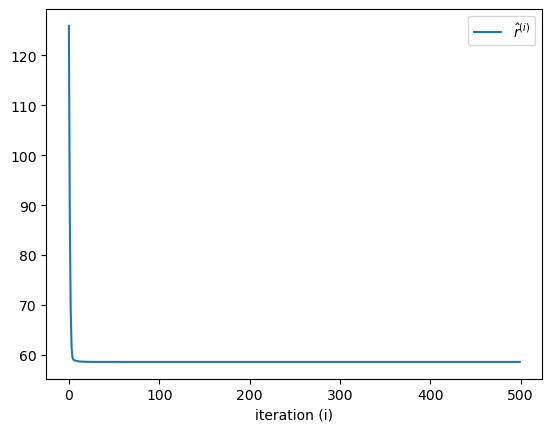

In [21]:
plt.plot(nhs, label=r"$\hat{r}^{(i)}$")
plt.xlabel("iteration (i)"); plt.legend()

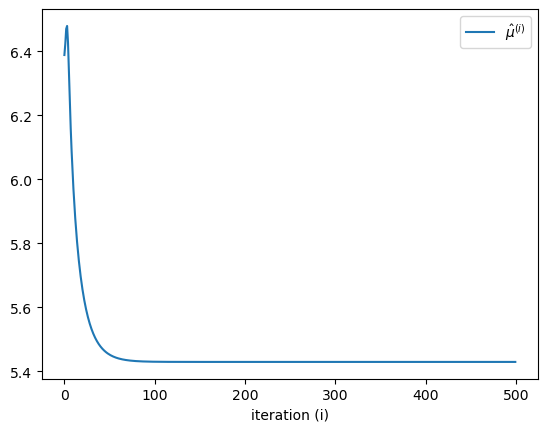

In [22]:
plt.plot(mhs, label=r"$\hat{\mu}^{(i)}$")
plt.xlabel("iteration (i)"); plt.legend()

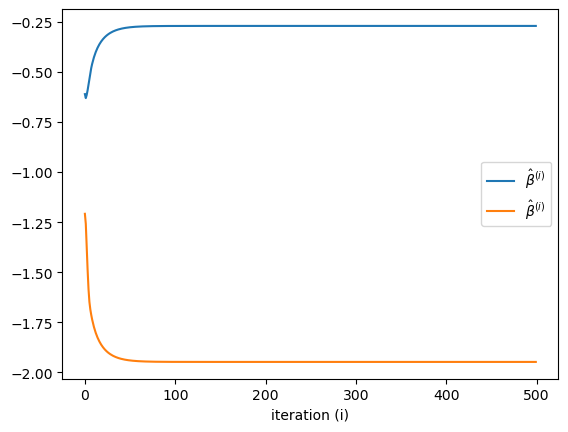

In [23]:
plt.plot(bhs, label=r"$\hat{\beta}^{(i)}$")
plt.xlabel("iteration (i)"); plt.legend()

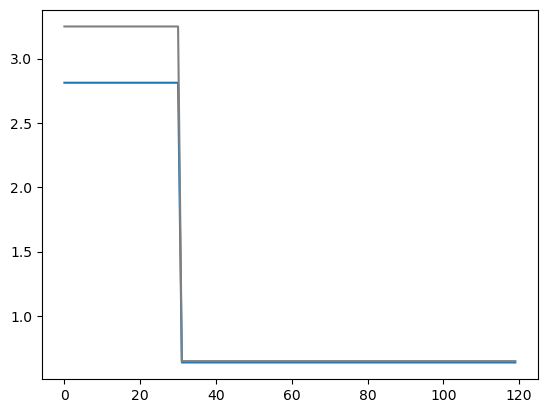

In [24]:
plt.plot(Rmle)
plt.plot(R, color='grey')

<BarContainer object of 120 artists>

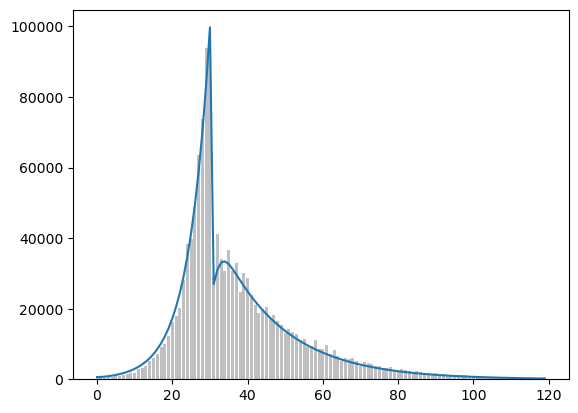

In [25]:
plt.plot(Imle)
plt.bar(np.arange(T), I, color='grey', alpha=0.5)

In [26]:
conf_Y = model.confidence_Y(A, nmle, mmle, bmle, alpha=0.05)

<BarContainer object of 120 artists>

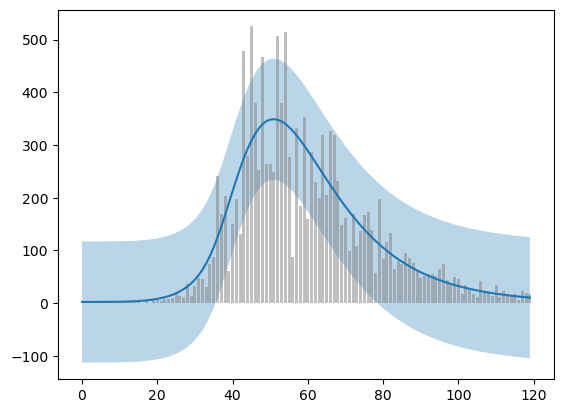

In [27]:
plt.plot(EYmle)
plt.fill_between(np.arange(T), conf_Y[:,0], conf_Y[:,1], alpha=0.3)
plt.bar(np.arange(T), Y, color='grey', alpha=0.5)

# 4. Confidence Region

In [28]:
Ihat_dth, Ihat_hac, Ihat_sdw = model.inference(A, Y, nmle, mmle, bmle)

In [29]:
chi_pa = freqepid.CV(d+1).chi_pa(0.05)

In [30]:
la.inv(Ihat_sdw)[-2:,-2:]

array([[ 0.05398199, -0.05718782],
       [-0.05718782,  0.06291629]])

In [31]:
la.inv(Ihat_dth)[-2:,-2:]

array([[ 0.05491221, -0.06095072],
       [-0.06095072,  0.06953809]])

## hessian

(-3.0, -1.0)

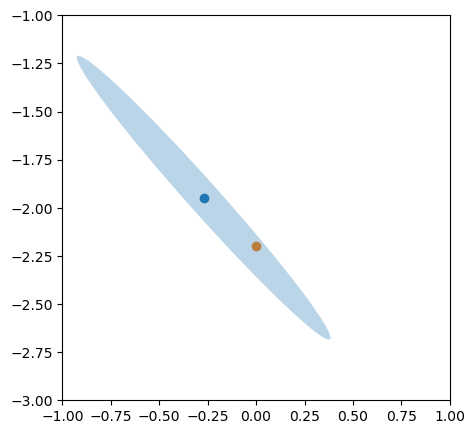

In [32]:
plt.figure(figsize=(5,5))
p = plt.scatter(*bmle)
plt.scatter(*beta)
freqepid.confidence_ellipse(
    bmle, np.linalg.pinv(Ihat_dth)[-2:,-2:], 
    n_std=chi_pa, facecolor=p.get_facecolor(), alpha=0.3)
plt.xlim(-1, 1); plt.ylim(-3,-1)

In [33]:
theta = np.array([mu, *beta])
tmle = np.array([mmle, *bmle])
tname = [r"$\mu$", r"$\beta_0$", r"$\beta_1$"]
tlimit = [[3, 8], [-1, 0.5], [-3, -1]]

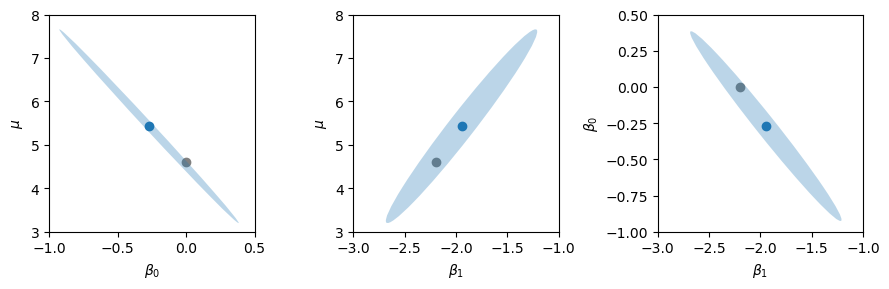

In [34]:
plt.figure(figsize=(9,3))
for i in np.arange(d+1):
    for j in np.arange(i+1,d+1):
        plt.subplot(1,3,i+j)
        p = plt.scatter(tmle[j], tmle[i])
        plt.scatter(theta[j], theta[i], color='grey')
        freqepid.confidence_ellipse(
            [tmle[j],tmle[i]], np.linalg.pinv(Ihat_dth)[np.ix_([j+1,i+1],[j+1,i+1])], 
            n_std=chi_pa, facecolor=p.get_facecolor(), alpha=0.3)
        plt.xlabel(tname[j]); plt.ylabel(tname[i])
        plt.xlim(tlimit[j]); plt.ylim(tlimit[i])
plt.tight_layout()

## Sandwich estimator

(-3.0, -1.0)

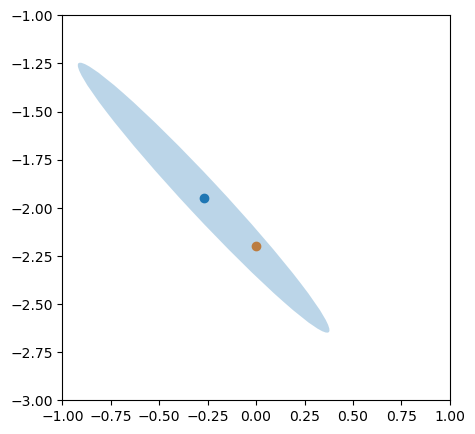

In [35]:
plt.figure(figsize=(5,5))
p = plt.scatter(*bmle)
plt.scatter(*beta)
freqepid.confidence_ellipse(
    bmle, np.linalg.pinv(Ihat_sdw)[-2:,-2:], 
    n_std=chi_pa, facecolor=p.get_facecolor(), alpha=0.3)
plt.xlim(-1, 1); plt.ylim(-3,-1)

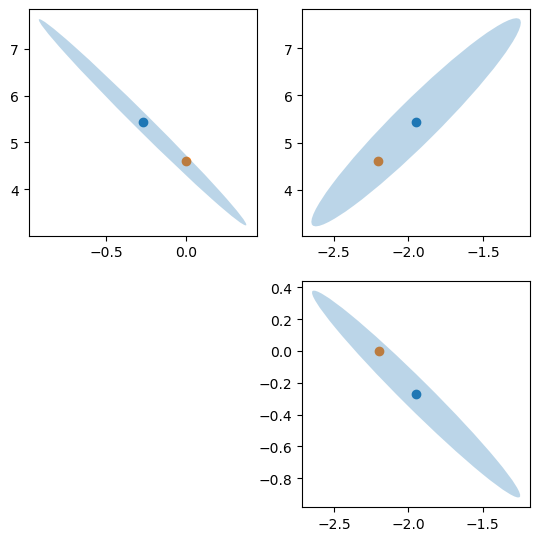

In [36]:
plt.figure(figsize=(10,10))
for i in np.arange(d+1):
    for j in np.arange(i+1,d+1):
        plt.subplot(d+1,d+1,i*(d+1)+j+1)
        p = plt.scatter(tmle[j], tmle[i])
        plt.scatter(theta[j], theta[i])
        freqepid.confidence_ellipse(
            [tmle[j],tmle[i]], np.linalg.pinv(Ihat_sdw)[np.ix_([j+1,i+1],[j+1,i+1])], 
            n_std=chi_pa, facecolor=p.get_facecolor(), alpha=0.3)

# 5. Confidence band

In [57]:
conf_R, beta_min, beta_max = \
model.confidence_R(A, bmle, np.linalg.inv(Ihat_dth)[-2:,-2:], chi_pa,
                   verbose=True)

optimization at t = 1 finished, lapse: 0.084sec.
optimization at t = 2 finished, lapse: 0.039sec.
optimization at t = 3 finished, lapse: 0.039sec.
optimization at t = 4 finished, lapse: 0.038sec.
optimization at t = 5 finished, lapse: 0.039sec.
optimization at t = 6 finished, lapse: 0.039sec.
optimization at t = 7 finished, lapse: 0.039sec.
optimization at t = 8 finished, lapse: 0.040sec.
optimization at t = 9 finished, lapse: 0.038sec.
optimization at t = 10 finished, lapse: 0.038sec.
optimization at t = 11 finished, lapse: 0.038sec.
optimization at t = 12 finished, lapse: 0.038sec.
optimization at t = 13 finished, lapse: 0.040sec.
optimization at t = 14 finished, lapse: 0.038sec.
optimization at t = 15 finished, lapse: 0.038sec.
optimization at t = 16 finished, lapse: 0.038sec.
optimization at t = 17 finished, lapse: 0.037sec.
optimization at t = 18 finished, lapse: 0.038sec.
optimization at t = 19 finished, lapse: 0.039sec.
optimization at t = 20 finished, lapse: 0.040sec.
optimizat

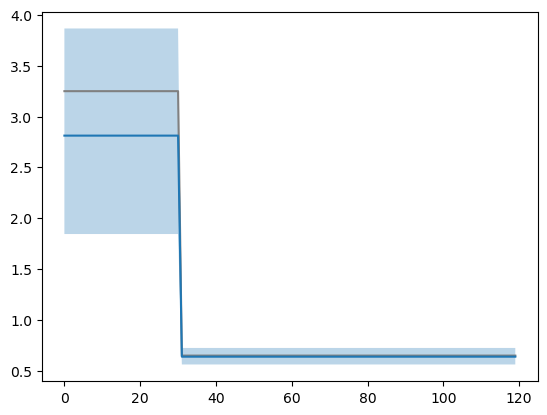

In [58]:
plt.plot(R, color='grey')
plt.plot(Rmle)
plt.fill_between(np.arange(T), conf_R[:,0], conf_R[:,1], alpha=0.3)

Text(0, 0.5, '$\\beta_1$')

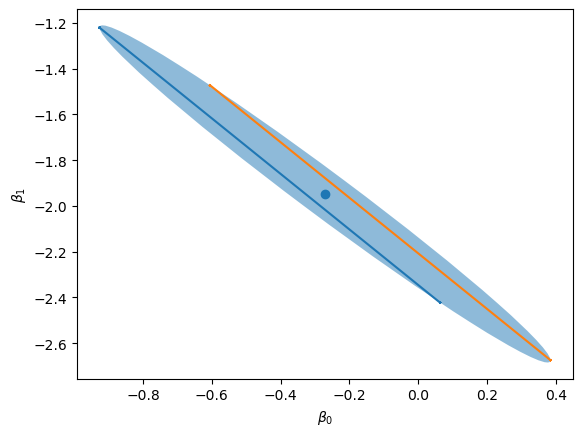

In [59]:
p = plt.scatter(*bmle)
freqepid.confidence_ellipse(
    bmle, np.linalg.inv(Ihat_dth)[-2:,-2:], n_std = chi_pa,
    facecolor=p.get_facecolor(), alpha=0.5)
plt.plot(beta_min[:,0], beta_min[:,1])
plt.plot(beta_max[:,0], beta_max[:,1])
#     confidence_ellipse(th_eb[i], Sigmas[i], ax, n_std = chi_pa,
#                        facecolor=p.get_facecolor(), alpha=0.25)
plt.xlabel(r"$\beta_0$"); plt.ylabel(r"$\beta_1$")

In [60]:
conf_I, _, _ = \
model.confidence_I(A, mmle, bmle, np.linalg.inv(Ihat_dth)[1:,1:], chi_pa,
                    verbose=True)

optimization at t = 1 finished, lapse: 0.140sec.
optimization at t = 2 finished, lapse: 1.182sec.
optimization at t = 3 finished, lapse: 0.300sec.
optimization at t = 4 finished, lapse: 0.172sec.
optimization at t = 5 finished, lapse: 0.140sec.
optimization at t = 6 finished, lapse: 0.119sec.
optimization at t = 7 finished, lapse: 0.812sec.
optimization at t = 8 finished, lapse: 0.149sec.
optimization at t = 9 finished, lapse: 0.620sec.
optimization at t = 10 finished, lapse: 0.166sec.
optimization at t = 11 finished, lapse: 0.192sec.
optimization at t = 12 finished, lapse: 0.441sec.
optimization at t = 13 finished, lapse: 0.220sec.
optimization at t = 14 finished, lapse: 0.264sec.
optimization at t = 15 finished, lapse: 0.159sec.
optimization at t = 16 finished, lapse: 0.221sec.
optimization at t = 17 finished, lapse: 0.248sec.
optimization at t = 18 finished, lapse: 0.293sec.
optimization at t = 19 finished, lapse: 0.189sec.
optimization at t = 20 finished, lapse: 0.225sec.
optimizat

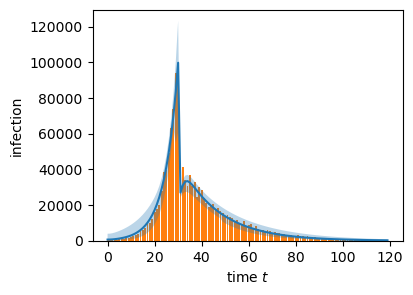

In [68]:
plt.figure(figsize = (4,3))
plt.xlabel("time $t$"); plt.ylabel("infection")
plt.bar(np.arange(T), I, color='C1')
plt.plot(Imle)
plt.fill_between(np.arange(T), conf_I[:,0], conf_I[:,1], alpha=0.3)

In [62]:
conf_EY, theta_min, theta_max = \
model.confidence_EY(A, mmle, bmle, np.linalg.inv(Ihat_dth)[1:,1:], chi_pa,
                    verbose=True)

optimization at t = 1 finished, lapse: 0.706sec.
optimization at t = 2 finished, lapse: 1.327sec.
optimization at t = 3 finished, lapse: 1.890sec.
optimization at t = 4 finished, lapse: 1.943sec.
optimization at t = 5 finished, lapse: 1.806sec.
optimization at t = 6 finished, lapse: 0.418sec.
optimization at t = 7 finished, lapse: 0.431sec.
optimization at t = 8 finished, lapse: 1.774sec.
optimization at t = 9 finished, lapse: 0.510sec.
optimization at t = 10 finished, lapse: 1.650sec.
optimization at t = 11 finished, lapse: 0.294sec.
optimization at t = 12 finished, lapse: 1.818sec.
optimization at t = 13 finished, lapse: 1.493sec.
optimization at t = 14 finished, lapse: 1.235sec.
optimization at t = 15 finished, lapse: 0.377sec.
optimization at t = 16 finished, lapse: 0.378sec.
optimization at t = 17 finished, lapse: 1.684sec.
optimization at t = 18 finished, lapse: 0.347sec.
optimization at t = 19 finished, lapse: 0.132sec.
optimization at t = 20 finished, lapse: 0.634sec.
optimizat

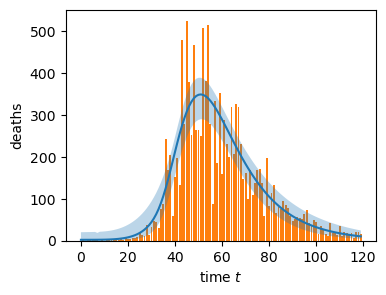

In [67]:
plt.figure(figsize = (4,3))
plt.xlabel("time $t$"); plt.ylabel("deaths")
plt.bar(np.arange(T), Y, color='C1')
plt.plot(EYmle)
plt.fill_between(np.arange(T), conf_EY[:,0], conf_EY[:,1], alpha=0.3)

In [65]:
conf_Y = \
model.confidence_Y(A, nmle, mmle, bmle, alpha=0.05, conf_EY=conf_EY)

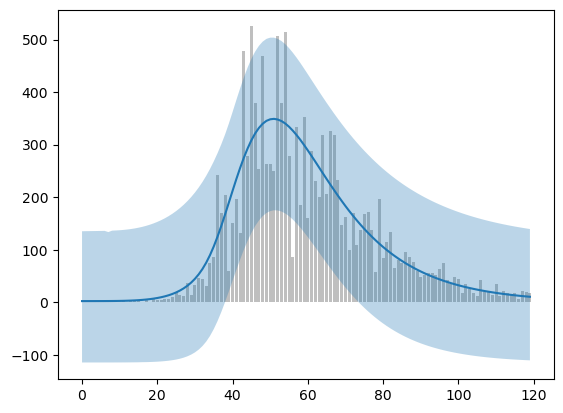

In [66]:
plt.bar(np.arange(T), Y, color='grey', alpha=0.5)
plt.plot(EYmle)
plt.fill_between(np.arange(T), conf_Y[:,0], conf_Y[:,1], alpha=0.3)

# 6. Confidence Interval & Causal forecasting

## A = 1

In [44]:
Tf = 60
Af = np.zeros([Tf, d])

In [45]:
Af[:,0] = np.full(Tf, 1)
Af[:,1] = np.full(Tf, 1)

In [46]:
Ae = np.concatenate([A, Af], 0)

In [47]:
conf_band, beta_min, beta_max = \
model.confidence_R(Ae, bmle, np.linalg.inv(Ihat_dth)[-2:,-2:], chi_pa,
                   verbose=True)

optimization at t = 1 finished, lapse: 0.117sec.
optimization at t = 2 finished, lapse: 0.051sec.
optimization at t = 3 finished, lapse: 0.049sec.
optimization at t = 4 finished, lapse: 0.050sec.
optimization at t = 5 finished, lapse: 0.049sec.
optimization at t = 6 finished, lapse: 0.051sec.
optimization at t = 7 finished, lapse: 0.049sec.
optimization at t = 8 finished, lapse: 0.049sec.
optimization at t = 9 finished, lapse: 0.049sec.
optimization at t = 10 finished, lapse: 0.049sec.
optimization at t = 11 finished, lapse: 0.049sec.
optimization at t = 12 finished, lapse: 0.050sec.
optimization at t = 13 finished, lapse: 0.049sec.
optimization at t = 14 finished, lapse: 0.049sec.
optimization at t = 15 finished, lapse: 0.049sec.
optimization at t = 16 finished, lapse: 0.049sec.
optimization at t = 17 finished, lapse: 0.051sec.
optimization at t = 18 finished, lapse: 0.049sec.
optimization at t = 19 finished, lapse: 0.049sec.
optimization at t = 20 finished, lapse: 0.048sec.
optimizat

optimization at t = 168 finished, lapse: 0.037sec.
optimization at t = 169 finished, lapse: 0.039sec.
optimization at t = 170 finished, lapse: 0.038sec.
optimization at t = 171 finished, lapse: 0.037sec.
optimization at t = 172 finished, lapse: 0.038sec.
optimization at t = 173 finished, lapse: 0.038sec.
optimization at t = 174 finished, lapse: 0.040sec.
optimization at t = 175 finished, lapse: 0.037sec.
optimization at t = 176 finished, lapse: 0.038sec.
optimization at t = 177 finished, lapse: 0.037sec.
optimization at t = 178 finished, lapse: 0.038sec.
optimization at t = 179 finished, lapse: 0.039sec.
optimization at t = 180 finished, lapse: 0.040sec.


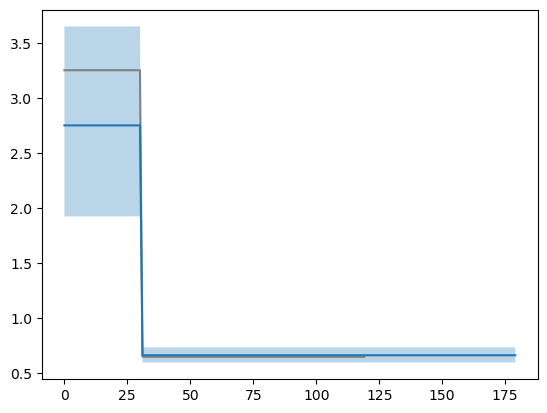

In [50]:
plt.plot(R, color='grey')
plt.plot(model.predict_R(Ae, bmle))
plt.fill_between(np.arange(np.shape(conf_band)[0]),
                 conf_band[:,0], conf_band[:,1], alpha=0.3)

In [51]:
conf_band, theta_min, theta_max = \
model.confidence_I(Ae, mmle, bmle, np.linalg.inv(Ihat_dth)[1:,1:], chi_pa,
                    verbose=True)

optimization at t = 1 finished, lapse: 0.203sec.
optimization at t = 2 finished, lapse: 0.528sec.
optimization at t = 3 finished, lapse: 0.134sec.
optimization at t = 4 finished, lapse: 0.197sec.
optimization at t = 5 finished, lapse: 1.236sec.
optimization at t = 6 finished, lapse: 0.358sec.
optimization at t = 7 finished, lapse: 0.114sec.
optimization at t = 8 finished, lapse: 0.271sec.
optimization at t = 9 finished, lapse: 0.066sec.
optimization at t = 10 finished, lapse: 0.081sec.
optimization at t = 11 finished, lapse: 0.113sec.
optimization at t = 12 finished, lapse: 0.063sec.
optimization at t = 13 finished, lapse: 0.151sec.
optimization at t = 14 finished, lapse: 0.113sec.
optimization at t = 15 finished, lapse: 0.200sec.
optimization at t = 16 finished, lapse: 0.165sec.
optimization at t = 17 finished, lapse: 0.572sec.
optimization at t = 18 finished, lapse: 0.194sec.
optimization at t = 19 finished, lapse: 0.212sec.
optimization at t = 20 finished, lapse: 0.190sec.
optimizat

optimization at t = 164 finished, lapse: 1.689sec.
optimization at t = 165 finished, lapse: 2.217sec.
optimization at t = 166 finished, lapse: 3.555sec.
optimization at t = 167 finished, lapse: 2.881sec.
optimization at t = 168 finished, lapse: 2.425sec.
optimization at t = 169 finished, lapse: 2.532sec.
optimization at t = 170 finished, lapse: 6.834sec.
optimization at t = 171 finished, lapse: 2.429sec.
optimization at t = 172 finished, lapse: 2.687sec.
optimization at t = 173 finished, lapse: 1.864sec.
optimization at t = 174 finished, lapse: 1.689sec.
optimization at t = 175 finished, lapse: 1.968sec.
optimization at t = 176 finished, lapse: 2.733sec.
optimization at t = 177 finished, lapse: 2.076sec.
optimization at t = 178 finished, lapse: 2.660sec.
optimization at t = 179 finished, lapse: 2.330sec.
optimization at t = 180 finished, lapse: 1.519sec.


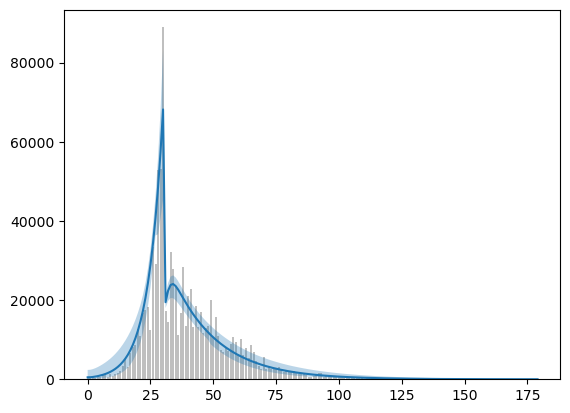

In [52]:
plt.bar(np.arange(T), I, color='grey', alpha=0.5)
plt.plot(model.predict_I(Ae, mmle, bmle))
plt.fill_between(np.arange(np.shape(conf_band)[0]),
                 conf_band[:,0], conf_band[:,1], alpha=0.3)

In [53]:
conf_band, theta_min, theta_max = \
model.confidence_EY(Ae, mmle, bmle, np.linalg.inv(Ihat_dth)[1:,1:], chi_pa,
                    verbose=True)

optimization at t = 1 finished, lapse: 1.437sec.
optimization at t = 2 finished, lapse: 0.303sec.
optimization at t = 3 finished, lapse: 1.628sec.
optimization at t = 4 finished, lapse: 1.075sec.
optimization at t = 5 finished, lapse: 1.426sec.
optimization at t = 6 finished, lapse: 1.483sec.
optimization at t = 7 finished, lapse: 1.209sec.
optimization at t = 8 finished, lapse: 1.658sec.
optimization at t = 9 finished, lapse: 1.784sec.
optimization at t = 10 finished, lapse: 1.388sec.
optimization at t = 11 finished, lapse: 0.326sec.
optimization at t = 12 finished, lapse: 0.826sec.
optimization at t = 13 finished, lapse: 0.178sec.
optimization at t = 14 finished, lapse: 0.152sec.
optimization at t = 15 finished, lapse: 1.185sec.
optimization at t = 16 finished, lapse: 0.149sec.
optimization at t = 17 finished, lapse: 1.132sec.
optimization at t = 18 finished, lapse: 1.298sec.
optimization at t = 19 finished, lapse: 0.196sec.
optimization at t = 20 finished, lapse: 0.279sec.
optimizat

optimization at t = 164 finished, lapse: 8.001sec.
optimization at t = 165 finished, lapse: 1.027sec.
optimization at t = 166 finished, lapse: 2.796sec.
optimization at t = 167 finished, lapse: 1.475sec.
optimization at t = 168 finished, lapse: 2.167sec.
optimization at t = 169 finished, lapse: 0.969sec.
optimization at t = 170 finished, lapse: 1.412sec.
optimization at t = 171 finished, lapse: 3.635sec.
optimization at t = 172 finished, lapse: 3.764sec.
optimization at t = 173 finished, lapse: 2.795sec.
optimization at t = 174 finished, lapse: 1.147sec.
optimization at t = 175 finished, lapse: 0.978sec.
optimization at t = 176 finished, lapse: 2.998sec.
optimization at t = 177 finished, lapse: 1.904sec.
optimization at t = 178 finished, lapse: 1.121sec.
optimization at t = 179 finished, lapse: 2.289sec.
optimization at t = 180 finished, lapse: 4.776sec.


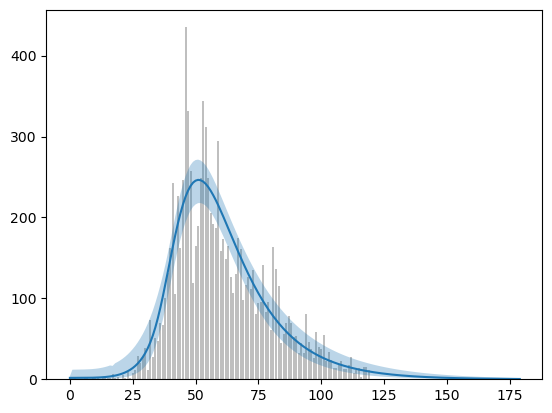

In [54]:
plt.bar(np.arange(T), Y, color='grey', alpha=0.5)
plt.plot(model.predict_EY(Ae, mmle, bmle))
plt.fill_between(np.arange(np.shape(conf_band)[0]),
                 conf_band[:,0], conf_band[:,1], alpha=0.3)

## A = 0.5

In [42]:
Tf = 60
Af = np.zeros([Tf, d])

In [43]:
Af[:,0] = np.full(Tf, 1)
Af[:,1] = np.full(Tf, 0.5)

In [44]:
Ae = np.concatenate([A, Af], 0)

In [45]:
conf_band, beta_min, beta_max = \
model.confidence_R(Ae, bmle, np.linalg.inv(Ihat_dth)[-2:,-2:], chi_pa,
                   verbose=True)

optimization at t = 1 finished, lapse: 0.196sec.
optimization at t = 2 finished, lapse: 0.080sec.
optimization at t = 3 finished, lapse: 0.092sec.
optimization at t = 4 finished, lapse: 0.103sec.
optimization at t = 5 finished, lapse: 0.108sec.
optimization at t = 6 finished, lapse: 0.077sec.
optimization at t = 7 finished, lapse: 0.110sec.
optimization at t = 8 finished, lapse: 0.081sec.
optimization at t = 9 finished, lapse: 0.074sec.
optimization at t = 10 finished, lapse: 0.192sec.
optimization at t = 11 finished, lapse: 0.095sec.
optimization at t = 12 finished, lapse: 0.109sec.
optimization at t = 13 finished, lapse: 0.105sec.
optimization at t = 14 finished, lapse: 0.088sec.
optimization at t = 15 finished, lapse: 0.202sec.
optimization at t = 16 finished, lapse: 0.112sec.
optimization at t = 17 finished, lapse: 0.081sec.
optimization at t = 18 finished, lapse: 0.114sec.
optimization at t = 19 finished, lapse: 0.095sec.
optimization at t = 20 finished, lapse: 0.105sec.
optimizat

optimization at t = 164 finished, lapse: 0.248sec.
optimization at t = 165 finished, lapse: 0.411sec.
optimization at t = 166 finished, lapse: 0.288sec.
optimization at t = 167 finished, lapse: 0.256sec.
optimization at t = 168 finished, lapse: 0.265sec.
optimization at t = 169 finished, lapse: 0.269sec.
optimization at t = 170 finished, lapse: 0.288sec.
optimization at t = 171 finished, lapse: 0.284sec.
optimization at t = 172 finished, lapse: 0.297sec.
optimization at t = 173 finished, lapse: 0.277sec.
optimization at t = 174 finished, lapse: 0.274sec.
optimization at t = 175 finished, lapse: 0.259sec.
optimization at t = 176 finished, lapse: 0.273sec.
optimization at t = 177 finished, lapse: 0.254sec.
optimization at t = 178 finished, lapse: 0.246sec.
optimization at t = 179 finished, lapse: 0.270sec.
optimization at t = 180 finished, lapse: 0.256sec.


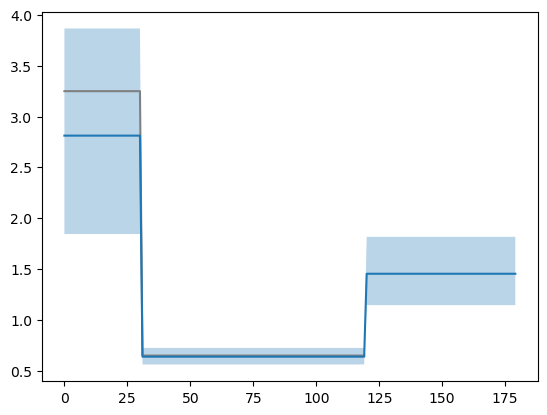

In [46]:
plt.plot(R, color='grey')
plt.plot(model.predict_R(Ae, bmle))
plt.fill_between(np.arange(np.shape(conf_band)[0]),
                 conf_band[:,0], conf_band[:,1], alpha=0.3)

In [47]:
conf_band, theta_min, theta_max = \
model.confidence_I(Ae, mmle, bmle, np.linalg.inv(Ihat_dth)[1:,1:], chi_pa,
                    verbose=True)

optimization at t = 1 finished, lapse: 0.341sec.
optimization at t = 2 finished, lapse: 3.125sec.
optimization at t = 3 finished, lapse: 0.632sec.
optimization at t = 4 finished, lapse: 0.401sec.
optimization at t = 5 finished, lapse: 0.368sec.
optimization at t = 6 finished, lapse: 0.414sec.
optimization at t = 7 finished, lapse: 2.429sec.
optimization at t = 8 finished, lapse: 0.600sec.
optimization at t = 9 finished, lapse: 2.031sec.
optimization at t = 10 finished, lapse: 0.648sec.
optimization at t = 11 finished, lapse: 0.464sec.
optimization at t = 12 finished, lapse: 1.180sec.
optimization at t = 13 finished, lapse: 0.631sec.
optimization at t = 14 finished, lapse: 0.669sec.
optimization at t = 15 finished, lapse: 0.460sec.
optimization at t = 16 finished, lapse: 0.575sec.
optimization at t = 17 finished, lapse: 0.586sec.
optimization at t = 18 finished, lapse: 0.716sec.
optimization at t = 19 finished, lapse: 0.525sec.
optimization at t = 20 finished, lapse: 0.677sec.
optimizat

optimization at t = 163 finished, lapse: 1063.799sec.
optimization at t = 164 finished, lapse: 29.783sec.
optimization at t = 165 finished, lapse: 21.754sec.
optimization at t = 166 finished, lapse: 300.598sec.
optimization at t = 167 finished, lapse: 22.680sec.
optimization at t = 168 finished, lapse: 16.908sec.
optimization at t = 169 finished, lapse: 946.363sec.
optimization at t = 170 finished, lapse: 1005.369sec.
optimization at t = 171 finished, lapse: 55.014sec.
optimization at t = 172 finished, lapse: 930.847sec.
optimization at t = 173 finished, lapse: 47.828sec.
optimization at t = 174 finished, lapse: 992.592sec.
optimization at t = 175 finished, lapse: 28.966sec.
optimization at t = 176 finished, lapse: 396.385sec.
optimization at t = 177 finished, lapse: 20.896sec.
optimization at t = 178 finished, lapse: 46.256sec.
optimization at t = 179 finished, lapse: 65.952sec.
optimization at t = 180 finished, lapse: 28.670sec.


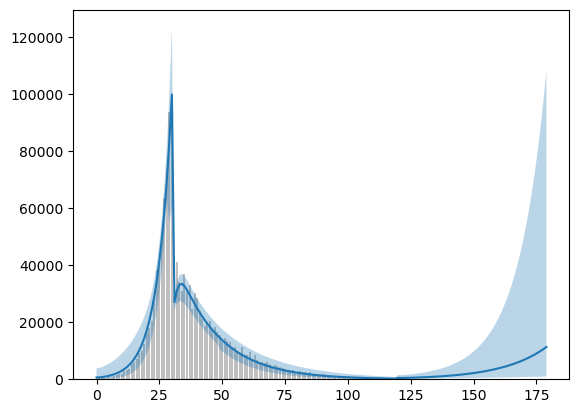

In [48]:
plt.bar(np.arange(T), I, color='grey', alpha=0.5)
plt.plot(model.predict_I(Ae, mmle, bmle))
plt.fill_between(np.arange(np.shape(conf_band)[0]),
                 conf_band[:,0], conf_band[:,1], alpha=0.3)

In [49]:
conf_band, theta_min, theta_max = \
model.confidence_EY(Ae, mmle, bmle, np.linalg.inv(Ihat_dth)[1:,1:], chi_pa,
                    verbose=True)

optimization at t = 1 finished, lapse: 1.852sec.
optimization at t = 2 finished, lapse: 3.646sec.
optimization at t = 3 finished, lapse: 740.774sec.
optimization at t = 4 finished, lapse: 4.884sec.
optimization at t = 5 finished, lapse: 4.839sec.
optimization at t = 6 finished, lapse: 1.088sec.
optimization at t = 7 finished, lapse: 1.058sec.
optimization at t = 8 finished, lapse: 4.993sec.
optimization at t = 9 finished, lapse: 1.232sec.
optimization at t = 10 finished, lapse: 4.015sec.
optimization at t = 11 finished, lapse: 0.971sec.
optimization at t = 12 finished, lapse: 4.737sec.
optimization at t = 13 finished, lapse: 3.897sec.
optimization at t = 14 finished, lapse: 3.345sec.
optimization at t = 15 finished, lapse: 0.844sec.
optimization at t = 16 finished, lapse: 1.028sec.
optimization at t = 17 finished, lapse: 4.077sec.
optimization at t = 18 finished, lapse: 0.842sec.
optimization at t = 19 finished, lapse: 0.312sec.
optimization at t = 20 finished, lapse: 1.782sec.
optimiz

optimization at t = 163 finished, lapse: 28.710sec.
optimization at t = 164 finished, lapse: 28.961sec.
optimization at t = 165 finished, lapse: 32.604sec.
optimization at t = 166 finished, lapse: 32.472sec.
optimization at t = 167 finished, lapse: 47.516sec.
optimization at t = 168 finished, lapse: 27.216sec.
optimization at t = 169 finished, lapse: 29.234sec.
optimization at t = 170 finished, lapse: 46.517sec.
optimization at t = 171 finished, lapse: 36.217sec.
optimization at t = 172 finished, lapse: 38.648sec.
optimization at t = 173 finished, lapse: 34.193sec.
optimization at t = 174 finished, lapse: 34.042sec.
optimization at t = 175 finished, lapse: 38.929sec.
optimization at t = 176 finished, lapse: 41.177sec.
optimization at t = 177 finished, lapse: 32.358sec.
optimization at t = 178 finished, lapse: 45.521sec.
optimization at t = 179 finished, lapse: 34.859sec.
optimization at t = 180 finished, lapse: 38.676sec.


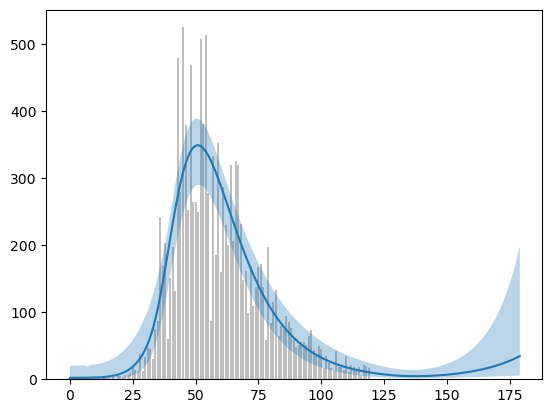

In [50]:
plt.bar(np.arange(T), Y, color='grey', alpha=0.5)
plt.plot(model.predict_EY(Ae, mmle, bmle))
plt.fill_between(np.arange(np.shape(conf_band)[0]),
                 conf_band[:,0], conf_band[:,1], alpha=0.3)

## A = 0

In [55]:
Tf = 60
Af = np.zeros([Tf, d])

In [56]:
Af[:,0] = np.full(Tf, 1)
Af[:,1] = np.full(Tf, 0)

In [57]:
Ae = np.concatenate([A, Af], 0)

In [58]:
conf_band, beta_min, beta_max = \
model.confidence_R(Ae, bmle, np.linalg.inv(Ihat_dth)[-2:,-2:], chi_pa,
                   verbose=True)

optimization at t = 1 finished, lapse: 0.097sec.
optimization at t = 2 finished, lapse: 0.058sec.
optimization at t = 3 finished, lapse: 0.054sec.
optimization at t = 4 finished, lapse: 0.054sec.
optimization at t = 5 finished, lapse: 0.057sec.
optimization at t = 6 finished, lapse: 0.055sec.
optimization at t = 7 finished, lapse: 0.054sec.
optimization at t = 8 finished, lapse: 0.054sec.
optimization at t = 9 finished, lapse: 0.051sec.
optimization at t = 10 finished, lapse: 0.053sec.
optimization at t = 11 finished, lapse: 0.052sec.
optimization at t = 12 finished, lapse: 0.051sec.
optimization at t = 13 finished, lapse: 0.052sec.
optimization at t = 14 finished, lapse: 0.054sec.
optimization at t = 15 finished, lapse: 0.052sec.
optimization at t = 16 finished, lapse: 0.052sec.
optimization at t = 17 finished, lapse: 0.052sec.
optimization at t = 18 finished, lapse: 0.053sec.
optimization at t = 19 finished, lapse: 0.051sec.
optimization at t = 20 finished, lapse: 0.052sec.
optimizat

optimization at t = 165 finished, lapse: 0.053sec.
optimization at t = 166 finished, lapse: 0.053sec.
optimization at t = 167 finished, lapse: 0.049sec.
optimization at t = 168 finished, lapse: 0.052sec.
optimization at t = 169 finished, lapse: 0.052sec.
optimization at t = 170 finished, lapse: 0.053sec.
optimization at t = 171 finished, lapse: 0.051sec.
optimization at t = 172 finished, lapse: 0.052sec.
optimization at t = 173 finished, lapse: 0.054sec.
optimization at t = 174 finished, lapse: 0.052sec.
optimization at t = 175 finished, lapse: 0.053sec.
optimization at t = 176 finished, lapse: 0.053sec.
optimization at t = 177 finished, lapse: 0.052sec.
optimization at t = 178 finished, lapse: 0.055sec.
optimization at t = 179 finished, lapse: 0.052sec.
optimization at t = 180 finished, lapse: 0.051sec.


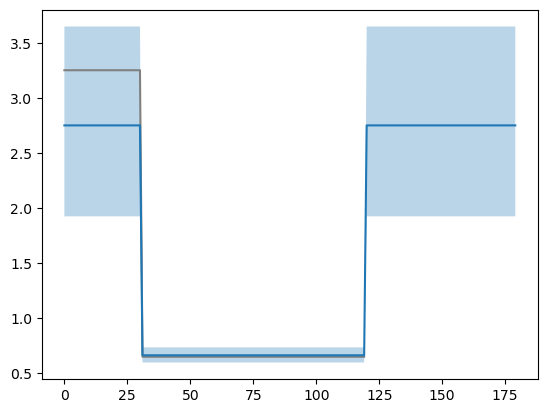

In [59]:
plt.plot(R, color='grey')
plt.plot(model.predict_R(Ae, bmle))
plt.fill_between(np.arange(np.shape(conf_band)[0]),
                 conf_band[:,0], conf_band[:,1], alpha=0.3)

In [60]:
conf_band, theta_min, theta_max = \
model.confidence_I(Ae, mmle, bmle, np.linalg.inv(Ihat_dth)[1:,1:], chi_pa,
                    verbose=True)

optimization at t = 1 finished, lapse: 0.177sec.
optimization at t = 2 finished, lapse: 0.541sec.
optimization at t = 3 finished, lapse: 0.137sec.
optimization at t = 4 finished, lapse: 0.195sec.
optimization at t = 5 finished, lapse: 1.226sec.
optimization at t = 6 finished, lapse: 0.350sec.
optimization at t = 7 finished, lapse: 0.113sec.
optimization at t = 8 finished, lapse: 0.271sec.
optimization at t = 9 finished, lapse: 0.066sec.
optimization at t = 10 finished, lapse: 0.080sec.
optimization at t = 11 finished, lapse: 0.115sec.
optimization at t = 12 finished, lapse: 0.064sec.
optimization at t = 13 finished, lapse: 0.156sec.
optimization at t = 14 finished, lapse: 0.114sec.
optimization at t = 15 finished, lapse: 0.205sec.
optimization at t = 16 finished, lapse: 0.171sec.
optimization at t = 17 finished, lapse: 0.587sec.
optimization at t = 18 finished, lapse: 0.198sec.
optimization at t = 19 finished, lapse: 0.218sec.
optimization at t = 20 finished, lapse: 0.192sec.
optimizat

optimization at t = 164 finished, lapse: 3.364sec.
optimization at t = 165 finished, lapse: 5.143sec.
optimization at t = 166 finished, lapse: 6.147sec.
optimization at t = 167 finished, lapse: 5.319sec.
optimization at t = 168 finished, lapse: 4.250sec.
optimization at t = 169 finished, lapse: 4.833sec.
optimization at t = 170 finished, lapse: 4.136sec.
optimization at t = 171 finished, lapse: 5.121sec.
optimization at t = 172 finished, lapse: 5.009sec.
optimization at t = 173 finished, lapse: 3.937sec.
optimization at t = 174 finished, lapse: 5.202sec.
optimization at t = 175 finished, lapse: 3.749sec.
optimization at t = 176 finished, lapse: 3.269sec.
optimization at t = 177 finished, lapse: 5.093sec.
optimization at t = 178 finished, lapse: 5.225sec.
optimization at t = 179 finished, lapse: 4.583sec.
optimization at t = 180 finished, lapse: 4.320sec.


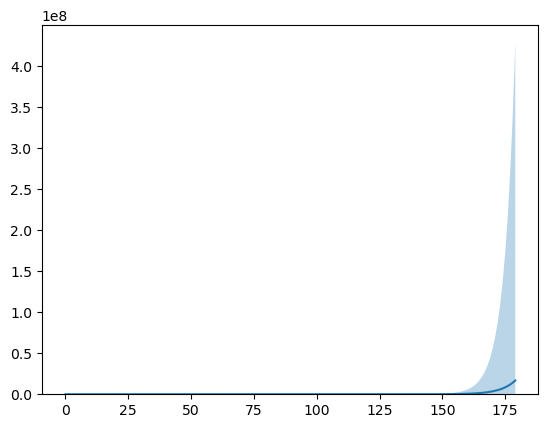

In [61]:
plt.bar(np.arange(T), I, color='grey', alpha=0.5)
plt.plot(model.predict_I(Ae, mmle, bmle))
plt.fill_between(np.arange(np.shape(conf_band)[0]),
                 conf_band[:,0], conf_band[:,1], alpha=0.3)

In [62]:
conf_band, theta_min, theta_max = \
model.confidence_EY(Ae, mmle, bmle, np.linalg.inv(Ihat_dth)[1:,1:], chi_pa,
                    verbose=True)

optimization at t = 1 finished, lapse: 1.524sec.
optimization at t = 2 finished, lapse: 0.298sec.
optimization at t = 3 finished, lapse: 1.625sec.
optimization at t = 4 finished, lapse: 1.059sec.
optimization at t = 5 finished, lapse: 1.437sec.
optimization at t = 6 finished, lapse: 1.483sec.
optimization at t = 7 finished, lapse: 1.237sec.
optimization at t = 8 finished, lapse: 1.681sec.
optimization at t = 9 finished, lapse: 1.807sec.
optimization at t = 10 finished, lapse: 1.385sec.
optimization at t = 11 finished, lapse: 0.327sec.
optimization at t = 12 finished, lapse: 0.849sec.
optimization at t = 13 finished, lapse: 0.183sec.
optimization at t = 14 finished, lapse: 0.154sec.
optimization at t = 15 finished, lapse: 1.208sec.
optimization at t = 16 finished, lapse: 0.153sec.
optimization at t = 17 finished, lapse: 1.166sec.
optimization at t = 18 finished, lapse: 1.326sec.
optimization at t = 19 finished, lapse: 0.201sec.
optimization at t = 20 finished, lapse: 0.286sec.
optimizat

optimization at t = 164 finished, lapse: 2.828sec.
optimization at t = 165 finished, lapse: 3.575sec.
optimization at t = 166 finished, lapse: 3.169sec.
optimization at t = 167 finished, lapse: 2.944sec.
optimization at t = 168 finished, lapse: 3.310sec.
optimization at t = 169 finished, lapse: 3.824sec.
optimization at t = 170 finished, lapse: 2.910sec.
optimization at t = 171 finished, lapse: 4.019sec.
optimization at t = 172 finished, lapse: 2.711sec.
optimization at t = 173 finished, lapse: 2.737sec.
optimization at t = 174 finished, lapse: 4.561sec.
optimization at t = 175 finished, lapse: 3.639sec.
optimization at t = 176 finished, lapse: 3.607sec.
optimization at t = 177 finished, lapse: 4.368sec.
optimization at t = 178 finished, lapse: 2.536sec.
optimization at t = 179 finished, lapse: 3.525sec.
optimization at t = 180 finished, lapse: 3.816sec.


(0.0, 2000.0)

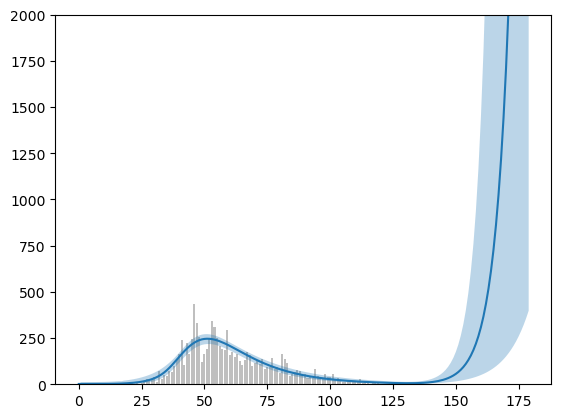

In [63]:
plt.bar(np.arange(T), Y, color='grey', alpha=0.5)
plt.plot(model.predict_EY(Ae, mmle, bmle))
plt.fill_between(np.arange(np.shape(conf_band)[0]),
                 conf_band[:,0], conf_band[:,1], alpha=0.3)
plt.ylim(0,2000)

# 7. Model checking

## model diagnostics

In [37]:
p_stdrd = np.zeros(T)
t_stdrd = np.zeros(T)

In [38]:
for t in np.arange(T):
    EYmle = model.predict_EY(A, mmle, bmle)
    
    p_stdrd[t] = stats.nbinom.cdf(Y[t], nmle, nmle/(nmle+EYmle[t]))
    t_stdrd[t] = (Y[t] - EYmle[t]) / np.sqrt(EYmle[t] * (nmle + EYmle[t]) / nmle)

[]

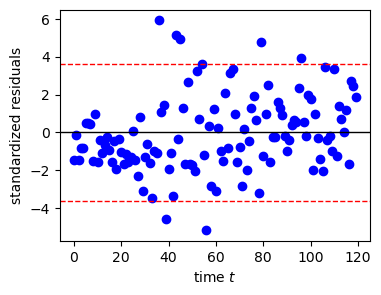

In [40]:
plt.figure(figsize=(4,3))
plt.scatter(np.arange(T), t_stdrd, color='blue')
plt.axhline(y=0, linewidth=1, color='black')
plt.axhline(y=stats.t.ppf(0.025/(T-d), df=T-d), linewidth=1, color='red', linestyle='--')
plt.axhline(y=-stats.t.ppf(0.025/(T-d), df=T-d), linewidth=1, color='red', linestyle='--')
plt.xlabel('time $t$')
plt.ylabel(r'standardized residuals')
plt.plot()

[]

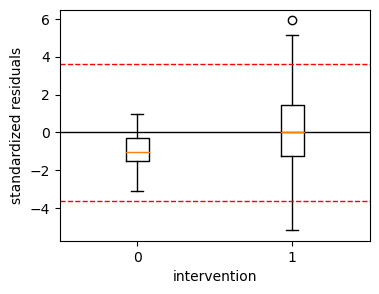

In [42]:
plt.figure(figsize=(4,3))
plt.boxplot([t_stdrd[A[:,-1]==0], t_stdrd[A[:,-1]==1]], labels=[0,1])
plt.axhline(y=0, linewidth=1, color='black')
plt.axhline(y=stats.t.ppf(0.025/(T-d), df=T-d), linewidth=1, color='red', linestyle='--')
plt.axhline(y=-stats.t.ppf(0.025/(T-d), df=T-d), linewidth=1, color='red', linestyle='--')
plt.xlabel('intervention')
plt.ylabel(r'standardized residuals')
plt.plot()

[]

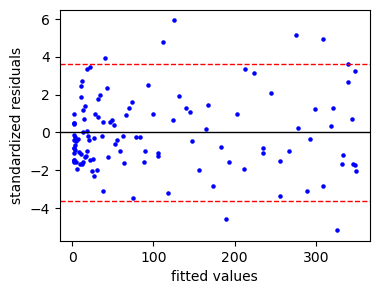

In [43]:
plt.figure(figsize=(4,3))
plt.scatter(EYmle, t_stdrd, color='blue', s=5)
plt.axhline(y=0, linewidth=1, color='black')
plt.axhline(y=stats.t.ppf(0.025/(T-d), df=T-d), linewidth=1, color='red', linestyle='--')
plt.axhline(y=-stats.t.ppf(0.025/(T-d), df=T-d), linewidth=1, color='red', linestyle='--')
plt.xlabel('fitted values')
plt.ylabel(r'standardized residuals')
plt.plot()

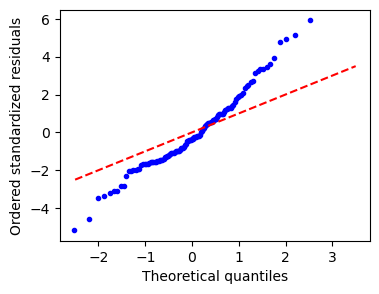

In [45]:
plt.figure(figsize=(4,3))
stats.probplot(t_stdrd, dist="norm", plot=plt, fit=False)
plt.gca().get_lines()[0].set_markersize(3)
plt.plot([-2.5, 3.5], [-2.5, 3.5], color='red', linestyle='--')
plt.title('')
plt.ylabel(r'Ordered standardized residuals')
plt.show()

Text(0, 0.5, 'standardized residuals')

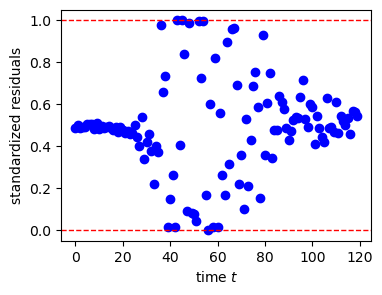

In [42]:
plt.figure(figsize=(4,3))
plt.scatter(np.arange(T), p_error, color='blue')
plt.axhline(y=0.025/(T-d), linewidth=1, color='red', linestyle='--')
plt.axhline(y=1-0.025/(T-d), linewidth=1, color='red', linestyle='--')
plt.xlabel('time $t$')
plt.ylabel(r'standardized residuals')

Text(0, 0.5, 'p-residuals')

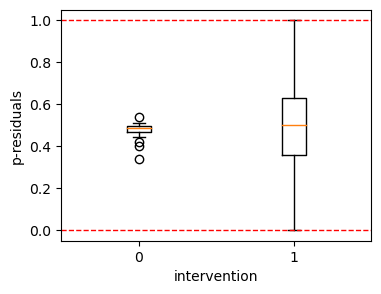

In [43]:
plt.figure(figsize=(4,3))
plt.boxplot([p_error[A[:,-1]==0], p_error[A[:,-1]==1]], labels=[0,1])
plt.axhline(y=0.025/(T-d), linewidth=1, color='red', linestyle='--')
plt.axhline(y=1-0.025/(T-d), linewidth=1, color='red', linestyle='--')
plt.xlabel('intervention')
plt.ylabel(r'p-residuals')

Text(0, 0.5, 'p-residuals')

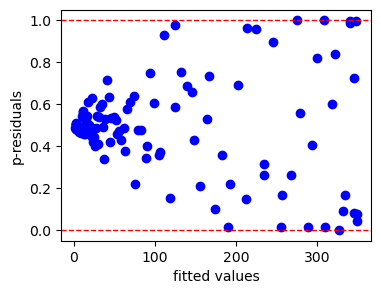

In [44]:
plt.figure(figsize=(4,3))
plt.scatter(EYmle, p_error, color='blue')
plt.axhline(y=0.025/(T-d), linewidth=1, color='red', linestyle='--')
plt.axhline(y=1-0.025/(T-d), linewidth=1, color='red', linestyle='--')
plt.xlabel('fitted values')
plt.ylabel(r'p-residuals')

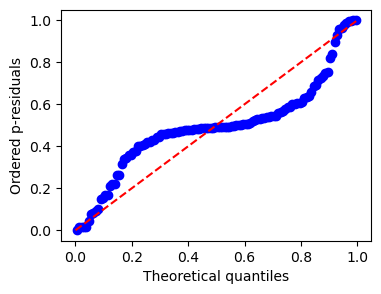

In [45]:
plt.figure(figsize=(4,3))
stats.probplot(p_error, dist="uniform", plot=plt, fit=False)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('')
plt.ylabel(r'Ordered p-residuals')
plt.show()

## case diagnostics

In [46]:
tmts = np.zeros((T, d+2))

In [38]:
for t in np.arange(T):
    start_iter = time.time()
    
    Ymt = Y.copy().astype(float)
    Ymt[t] = np.nan
    
    nmt, mmt, bmt, _ =\
    model.fit(A, Ymt, n_iter=500, step_size=1,
              minit = mmle, binit = bmle,
              history=False, verbose=False)
    
    tmts[t] = np.array((nmt, mmt, *bmt))
    
    print("Leave-one-out estimation at t = %d finished, lapse: %.3fsec."
          %(t+1, time.time()-start_iter))

Leave-one-out estimation at t = 1 finished, lapse: 16.540sec.
Leave-one-out estimation at t = 2 finished, lapse: 13.957sec.
Leave-one-out estimation at t = 3 finished, lapse: 14.521sec.
Leave-one-out estimation at t = 4 finished, lapse: 13.930sec.
Leave-one-out estimation at t = 5 finished, lapse: 15.328sec.
Leave-one-out estimation at t = 6 finished, lapse: 14.610sec.
Leave-one-out estimation at t = 7 finished, lapse: 14.462sec.
Leave-one-out estimation at t = 8 finished, lapse: 14.678sec.
Leave-one-out estimation at t = 9 finished, lapse: 13.899sec.
Leave-one-out estimation at t = 10 finished, lapse: 13.143sec.
Leave-one-out estimation at t = 11 finished, lapse: 13.612sec.
Leave-one-out estimation at t = 12 finished, lapse: 13.978sec.
Leave-one-out estimation at t = 13 finished, lapse: 13.295sec.
Leave-one-out estimation at t = 14 finished, lapse: 12.300sec.
Leave-one-out estimation at t = 15 finished, lapse: 12.817sec.
Leave-one-out estimation at t = 16 finished, lapse: 13.644sec.
L

In [39]:
# np.savez("result_freqepid_nbinom_randinf.npz",
#          nmle = nmle, mmle = mmle, bmle =  bmle, EYmle = EYmle,
#          tmts = tmts)

In [47]:
locals().update(
    np.load("result_freqepid_normal_randinf.npz")
)

In [48]:
leverage = np.zeros(T)
cook_dist = np.zeros(T)
p_stdnt = np.zeros(T)
t_stdnt = np.zeros(T)

In [49]:
MSE = np.sum((Y - EYmle)**2) / (T - (d+1))

In [50]:
for t in np.arange(T):
    nmt = tmts[t,0]
    mmt = tmts[t,1]
    bmt = tmts[t,2:]
    EYmt = model.predict_EY(A, mmt, bmt)
    
    leverage[t] = (bmt[-1] - bmle[-1]) / np.sqrt(la.inv(Ihat_sdw)[-1,-1])
    cook_dist[t] = np.sum((EYmt - EYmle)**2) / (d+1) / MSE
    p_stdnt[t] = stats.nbinom.cdf(Y[t], nmt, nmt/(nmt+EYmt[t]))
    t_stdnt[t] = (Y[t] - EYmt[t]) / np.sqrt(EYmt[t] * (nmt + EYmt[t]) / nmt)

Text(0, 0.5, 'influence measure')

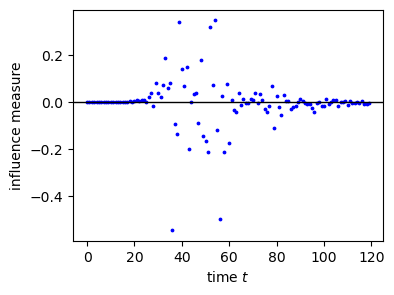

In [51]:
plt.figure(figsize=(4,3))
plt.scatter(np.arange(T), leverage, color='blue', s=3)
plt.axhline(y=0, color='black', linewidth=1)
plt.xlabel('time $t$')
plt.ylabel(r"influence measure")

Text(0, 0.5, "Cook's distance")

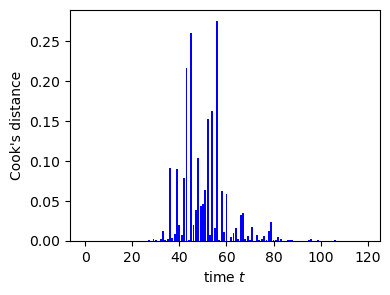

In [52]:
plt.figure(figsize=(4,3))
plt.bar(np.arange(T), cook_dist, color='blue')
plt.xlabel('time $t$'); plt.ylabel("Cook's distance")

[]

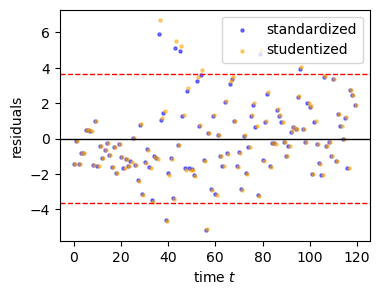

In [78]:
plt.figure(figsize=(4,3))
plt.scatter(np.arange(T), t_stdrd, color='blue', alpha=0.5, s=5, label='standardized')
plt.scatter(np.arange(T)+0.5, t_stdnt, color='orange', alpha=0.5, s=5, label='studentized')
plt.axhline(y=0, linewidth=1, color='black')
plt.axhline(y=stats.t.ppf(0.025/(T-d), df=T-d), linewidth=1, color='red', linestyle='--')
plt.axhline(y=-stats.t.ppf(0.025/(T-d), df=T-d), linewidth=1, color='red', linestyle='--')
plt.xlabel('time $t$') 
plt.ylabel(r'residuals')
plt.legend(); plt.plot()

Text(0, 0.5, 'studentized p-residuals')

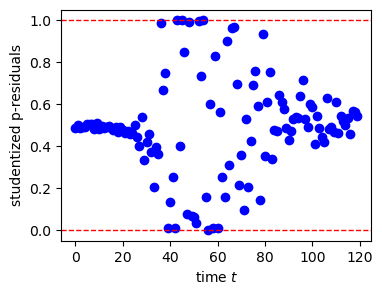

In [55]:
plt.figure(figsize=(4,3))
plt.scatter(np.arange(T), p_error, color='blue')
plt.axhline(y=0.025/(T-d), linewidth=1, color='red', linestyle='--')
plt.axhline(y=1-0.025/(T-d), linewidth=1, color='red', linestyle='--')
plt.xlabel('time $t$')
plt.ylabel(r'studentized p-residuals')